## Task 2 Unsupervised ML

### Prediction using Unsupervised ML

#### Ashutosh Kumar

#### Loading required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading dataset

In [8]:
from sklearn import datasets
iris = datasets.load_iris()
iris_data=pd.DataFrame(iris.data, columns = iris.feature_names)
print("data loaded")
iris_data.head()

data loaded


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Getting more about data

In [20]:
iris_data.shape
print("Total record in dataset=",iris_data.shape[0])

Total record in dataset= 150


In [21]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


### finding  optimum number of clusters for K Means

In [11]:
x=iris_data.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
sse=[]
for i in range(1,11):
    kmeans = KMeans(init="random",n_clusters=i,n_init=10,max_iter=300,random_state=42)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
print(sse)

[681.3705999999996, 152.34795176035797, 78.851441426146, 57.25600931571815, 46.47223015873018, 39.03998724608725, 34.7822041847042, 30.015880952380968, 28.01745676691731, 25.989770046774705]


### Plotting

Text(0, 0.5, 'SSE')

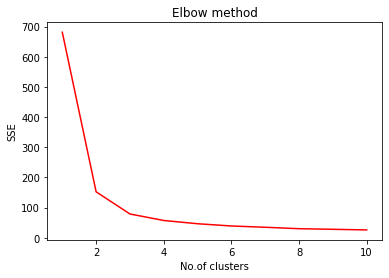

In [14]:
plt.plot(range(1,11),sse,c='red')
plt.title("Elbow method")
plt.xlabel("No.of clusters")
plt.ylabel("SSE")

**We can clearly see that elbow occurs at k=3.so we choose k==3 for our result**

In [16]:
## now applying k-meanson our dataset for k=3
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
y_pred=kmeans.fit_predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

## Visualization

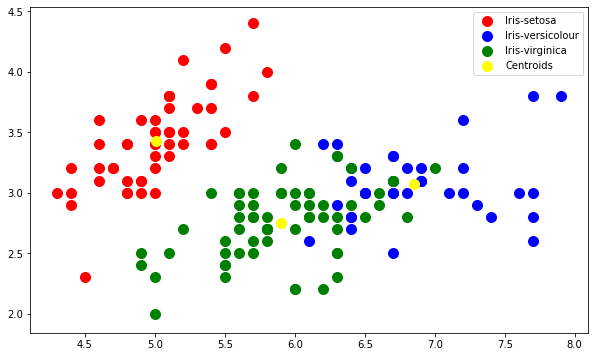

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()